In [13]:
import pandas as pd

# Load the dataset (replace 'stellar_data.csv' with your actual file name)
df = pd.read_csv(r"/Users/khushikailasam/star_classification.csv")

# Display the first few rows
print("🔍 First few rows:")
print(df.head())

# Check for missing values
print("\n🧹 Missing values:")
print(df.isnull().sum())

# Convert scientific notation strings (if necessary)
df['obj_ID'] = df['obj_ID'].astype(float)
df['spec_obj_ID'] = df['spec_obj_ID'].astype(float)

# Ensure numerical types for magnitude and coordinates
mag_cols = ['u', 'g', 'r', 'i', 'z', 'alpha', 'delta', 'redshift']
df[mag_cols] = df[mag_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
print("\n📊 Summary statistics:")
print(df.describe())

# Unique classes
print("\n🔭 Unique object classes:")
print(df['class'].unique())

# Optional: Save cleaned version
df.to_csv('stellar_data_cleaned.csv', index=False)


🔍 First few rows:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop non-feature columns (IDs etc.)
drop_cols = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df_model = df.drop(columns=drop_cols)

# Encode class labels
le = LabelEncoder()
df_model['class'] = le.fit_transform(df_model['class'])  # Maps 'GALAXY', 'STAR', 'QSO' to 0/1/2

# Split features and target
X = df_model.drop(columns=['class'])
y = df_model['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


✅ Accuracy: 0.9772

📋 Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.96      0.92      0.94      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



/Users/khushikailasam/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


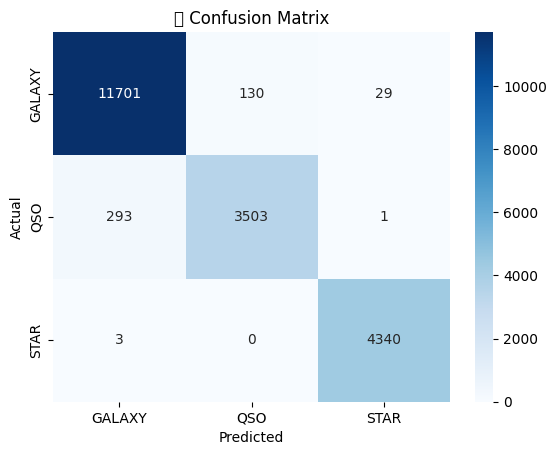

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔍 Confusion Matrix")
plt.show()


/var/folders/hb/lzm4snhn4rgcnb6gdflrmrqr0000gn/T/ipykernel_32419/4109633885.py:3: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
/Users/khushikailasam/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


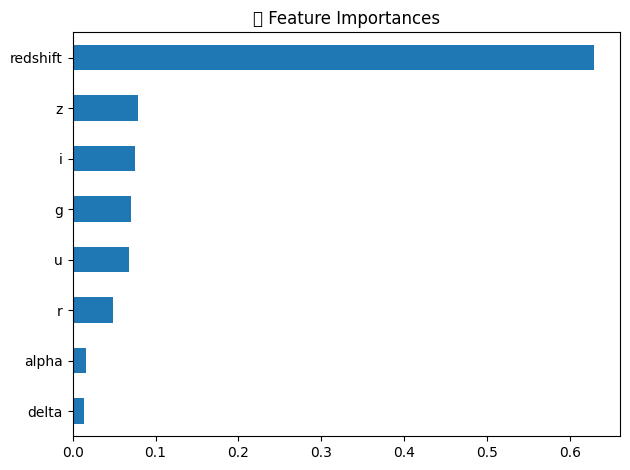

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='⭐ Feature Importances')
plt.tight_layout()
plt.show()
